The main sound is: Chop


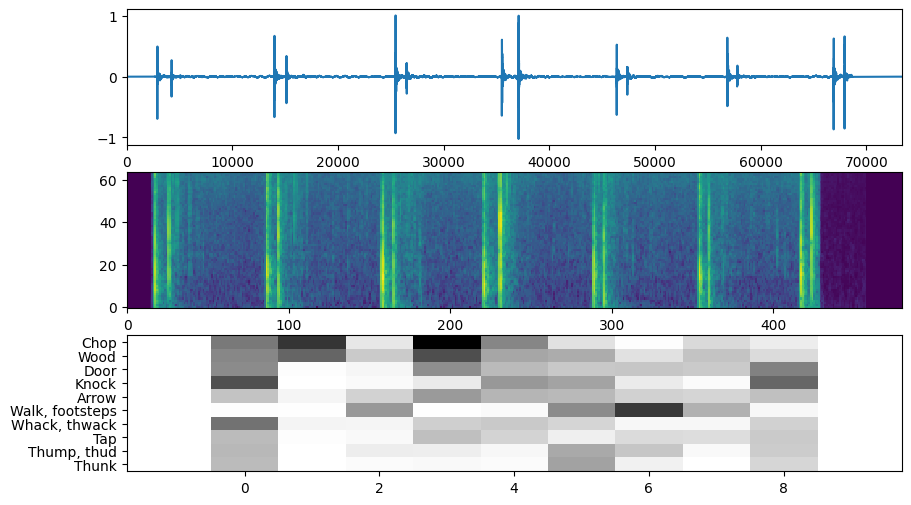

In [7]:
# 음성파일 시간 자르기
import librosa
import scipy.io.wavfile as wavf
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import csv
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile

# Find the name of the class with the top score when mean-aggregated across frames.
def class_names_from_csv(class_map_csv_text):
  """Returns list of class names corresponding to score vector."""
  class_names = []
  with tf.io.gfile.GFile(class_map_csv_text) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
      class_names.append(row['display_name'])

  return class_names

# Load the model.
model = hub.load('https://tfhub.dev/google/yamnet/1')

class_map_path = model.class_map_path().numpy()
class_names = class_names_from_csv(class_map_path)


def ensure_sample_rate(original_sample_rate, waveform,
                       desired_sample_rate=16000):
  """Resample waveform if required."""
  if original_sample_rate != desired_sample_rate:
    desired_length = int(round(float(len(waveform)) /
                               original_sample_rate * desired_sample_rate))
    waveform = scipy.signal.resample(waveform, desired_length)
  return desired_sample_rate, waveform

####################################################
sr = 16000
signal, sr = librosa.load("/content/9954E23E5CF3D30227.mp3", sr=sr)

# signal = signal[int(20*16000):int(25*16000)]
####################################################


wavf.write(f"test.wav", sr, signal)

wav_file_name = "./test.wav"

sample_rate, wav_data = wavfile.read(wav_file_name, 'rb')
sample_rate, wav_data = ensure_sample_rate(sample_rate, wav_data)
Audio(wav_data, rate=sr)

waveform = wav_data
# display_waveform(wav_data)

# Run the model, check the output.
scores, embeddings, spectrogram = model(waveform)

scores_np = scores.numpy()
spectrogram_np = spectrogram.numpy()
infered_class = class_names[scores_np.mean(axis=0).argmax()]
print(f'The main sound is: {infered_class}')

plt.figure(figsize=(10, 6))

# Plot the waveform.
plt.subplot(3, 1, 1)
plt.plot(waveform)
plt.xlim([0, len(waveform)])

# Plot the log-mel spectrogram (returned by the model).
plt.subplot(3, 1, 2)
plt.imshow(spectrogram_np.T, aspect='auto', interpolation='nearest', origin='lower')

# Plot and label the model output scores for the top-scoring classes.
mean_scores = np.mean(scores, axis=0)
top_n = 10
top_class_indices = np.argsort(mean_scores)[::-1][:top_n]
plt.subplot(3, 1, 3)
plt.imshow(scores_np[:, top_class_indices].T, aspect='auto', interpolation='nearest', cmap='gray_r')

# patch_padding = (PATCH_WINDOW_SECONDS / 2) / PATCH_HOP_SECONDS
# values from the model documentation
patch_padding = (0.025 / 2) / 0.01
plt.xlim([-patch_padding-0.5, scores.shape[0] + patch_padding-0.5])
# Label the top_N classes.
yticks = range(0, top_n, 1)
plt.yticks(yticks, [class_names[top_class_indices[x]] for x in yticks])
_ = plt.ylim(-0.5 + np.array([top_n, 0]))
Audio(wav_data, rate=sr)

In [ ]:
!pip install soundfile librosa torch==2.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 104.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
!pip install transformers==4.28.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 145.2 MB/s eta 0:00:00


In [ ]:
!pip install peft==0.3.0.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 5.1 MB/s eta 0:00:00


In [ ]:
!mkdir whisper_model
# !mkdir beats_model
# !mkdir vicuna_model
# !mkdir salmonn_model

In [ ]:
from transformers import AutoModelForAudioClassification, Wav2Vec2Processor

# 예시: whisper 모델 다운로드
whisper_model = AutoModelForAudioClassification.from_pretrained("SungBeom/whisper-base-ko")
whisper_processor = Wav2Vec2Processor.from_pretrained("SungBeom/whisper-base-ko")

whisper_model.save_pretrained("/content/drive/MyDrive/salmonn/whisper_model")
whisper_processor.save_pretrained("/content/drive/MyDrive/salmonn/whisper_model")

Some weights of the model checkpoint at SungBeom/whisper-base-ko were not used when initializing WhisperForAudioClassification: ['model.decoder.layers.2.self_attn.q_proj.bias', 'model.decoder.layers.0.self_attn.out_proj.bias', 'model.decoder.layers.0.fc1.weight', 'model.decoder.layers.3.self_attn.out_proj.weight', 'model.decoder.layers.0.self_attn.q_proj.weight', 'model.decoder.layers.3.encoder_attn_layer_norm.weight', 'model.decoder.layers.1.self_attn_layer_norm.weight', 'model.decoder.layers.0.final_layer_norm.weight', 'model.decoder.layers.0.encoder_attn.q_proj.bias', 'model.decoder.layers.4.self_attn.out_proj.bias', 'model.decoder.layers.0.fc2.weight', 'model.decoder.layer_norm.bias', 'model.decoder.embed_tokens.weight', 'model.decoder.layers.4.self_attn_layer_norm.bias', 'model.decoder.layers.1.encoder_attn.out_proj.bias', 'model.decoder.layers.3.self_attn.out_proj.bias', 'model.decoder.layers.3.encoder_attn.out_proj.bias', 'model.decoder.layers.5.encoder_attn.k_proj.weight', 'mod

In [ ]:
!pip install -q git+https://github.com/pyannote/pyannote-audio

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.8/553.8 kB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 64.8 MB/

In [ ]:
import torch
import pyannote.audio
from pyannote.audio.pipelines.speaker_verification import PretrainedSpeakerEmbedding
embedding_model = PretrainedSpeakerEmbedding(
    "speechbrain/spkrec-ecapa-voxceleb",
    device=torch.device("cuda"))

from pyannote.audio import Audio
from pyannote.core import Segment

import wave
import contextlib

from sklearn.cluster import AgglomerativeClustering
import numpy as np

ModuleNotFoundError: ignored

In [ ]:
result =whisper_model.transcribe('/content/drive/MyDrive/salmonn/audio/fltest.flac')
result["segments"]

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# BEATs 모델은 이미 .pt 파일로 다운로드 되었으므로 해당 경로에 저장함

# vicuna 모델 다운로드 및 저장
vicuna_model = AutoModelForCausalLM.from_pretrained("lmsys/vicuna-13b-v1.1")
vicuna_tokenizer = AutoTokenizer.from_pretrained("lmsys/vicuna-13b-v1.1")
vicuna_model.save_pretrained("/content/drive/MyDrive/salmonn/vicuna_model")
vicuna_tokenizer.save_pretrained("/content/drive/MyDrive/salmonn/vicuna_model")

# # SALMONN 모델 다운로드 및 저장
# salmonn_model = AutoModelForCausalLM.from_pretrained("MSIIP/SALMONN")
# salmonn_tokenizer = AutoTokenizer.from_pretrained("MSIIP/SALMONN")
# salmonn_model.save_pretrained("/content/salmonn_model")
# salmonn_tokenizer.save_pretrained("/content/salmonn_model")
